In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import *

1)  En un notebook de jupyter desarrolle los siguientes pasos


Descargue el JSON con la lista de paises del siguiente link:


https://datahub.io/core/country-list/r/data.json


y escoja aleatoriamente un país


Use los diferentes API endpoints de inspire-hep 


https://inspirehep.net/


 para extraer la lista de investigadores de una institución de ese país  en esa base de datos. 


Para ello:

A) Use el API de institutions para extraer la lista de instituciones del país, por ejemplo: colombia
https://inspirehep.net/api/institutions?q=colombia


Para la primera institución con

number_of_papers > 0


Obtenga el valor

legacy_ICN:


Por ejemplo: 
Colombia, U. Natl.


Si ninguna institución satisface la condición number_of_papers > 0, escoja de nuevo otro país aleatorio y repita el proceso

In [146]:
#No tenía acceso a Jupyter en el momento así que lo hice a través de Colab y Drive

from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

!cp '/content/gdrive/MyDrive/Colab Notebooks/data.json' 'data.json'

Mounted at /content/gdrive


In [181]:
dat= pd.read_json('data.json') #Se importan los datos
alt= np.random.randint(0,195) #se escoge un número entre 0 y 195 (hsy 195 paises en el mundo)
cty= dat.loc[alt,'Name'] #dat.loc se usa para acceder a un grupo de filas y columnas
lnk = 'https://inspirehep.net/api/institutions?q=' + cty #el link queda modificado con  el nombre obtenido usando dat.loc
print(cty)

Finland


In [182]:
dat = pd.read_json(lnk) #Tenemos ahora el link evaluado en la base de datos

if dat['hits']['hits'][0]['metadata']['number_of_papers']<0:
   print('Intente de nuevo') #esto en caso de no cumplirse la condición pedida por el profesor
else: 
   print ('legacy_ICN:',dat['hits']['hits'][0]['metadata']['legacy_ICN']) #en caso de cumplirse

legacy_ICN: Helsinki, Academy of Finland


2) 
A) Genere un polinomio de numpy con 3 raices reales aleatorias entre los dos últimos números diferentes de su identificación (Ejemplo: 98554575 → 3 raices reales aleatorias  entre 5 y 7 )

In [94]:
#En mi caso sería utilizando los números 6 y 8

rnd = np.random.uniform(6,8,3) #Escoge los valores entre 6 y 8, pues este se usa para generar arrays con valores aleatorios uniformes
p = np.poly1d(np.poly(rnd)) #transforma en polimnomio
print(p) #muestra el polinomio

   3         2
1 x - 22.66 x + 171 x - 429.9


In [95]:
np.roots(p) #raices del polinomio

array([7.93770397, 7.41099168, 7.30808065])

B) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

In [96]:
#para esto podemos utilizar la función de derivada de numpy, pues esto hace todo más rápido y sencillo que otros métodos más manuales

der = np.polyder(p) #se deriva el polinomio
print(der) #se muestra el polinomio

   2
3 x - 45.31 x + 171


In [100]:
np.roots(der) #estas son las raices de la derivada

array([7.74725763, 7.3572599 ])

C) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

Un punto critico es máximo si se evalua este en la segunda derivada y nos da negativo, y es mínimo si al evaluarlo en la segunda derivada nos da positivo. 

In [98]:
#Ahora en este punto es necesario obtener la segunda derivada de nuestro polinomio, nuevamente <cudiendo a Numpy para ello

der2= np.polyder(der) #simplemente derivamos la derivada del polinomio
print(der2)

 
6 x - 45.31


In [101]:
#Ahora para los minimos y máximos es cuestión de evaluar el punto critico en la segunda derivada del polinomio

print('Evaluando el primer punto en la segunda derivada tenemos:' , der2(7.74725763))
print('Evaluando el segundo punto en la segunda derivada tenemos:' , der2(7.3572599))

Evaluando el primer punto en la segunda derivada tenemos: 1.1699931893837316
Evaluando el segundo punto en la segunda derivada tenemos: -1.1699931906162675


Teniendo en cuenta las codiciones anteriores, podemosa observar que el primer número es un mínimo y el segundo un máximo.

D) Grafique el polinomío inclueyendo los puntos asociados a las raices.

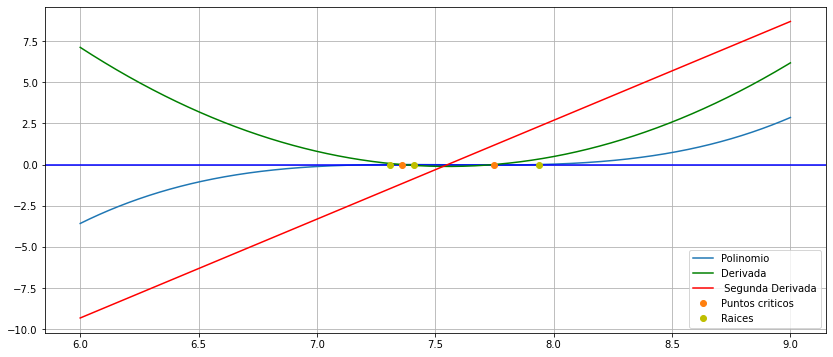

In [113]:

x= np.linspace(6,9,2000)
plt.figure(figsize= (14,6))
plt.plot(x,p(x), label= 'Polinomio')
plt.axhline(0,color="b")
plt.plot(x,der(x), label= 'Derivada', color="g")
plt.plot(x,der2(x), label= ' Segunda Derivada', color="r")
plt.plot([7.74725763,7.3572599],[p(7.74725763),p(7.3572599)], 'o', label='Puntos criticos')
plt.plot(np.roots(p),np.zeros(len(np.roots(p))),'o', label = "Raices", color="y")
plt.legend()
plt.grid()
plt.show()